In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
with open('svm.pkl', 'rb') as f:
    svm = pickle.load(f)
with open('tree.pkl', 'rb') as f:
    tree = pickle.load(f)
with open('knn.pkl', 'rb') as f:
    knn = pickle.load(f)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mnist_complete = pd.read_csv('/content/drive/My Drive/Dataset/mnist_train.csv')
def plot_mnist(img, label=''):
    plt.imshow(img.reshape((28,28)), cmap='gray')
    plt.title(str(label))
    plt.xticks([])
    plt.yticks([])

In [ ]:
mnist_complete = mnist_complete.drop('label', axis=1)

In [ ]:
mnist_complete.columns

Index(['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '1x10',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=784)

In [ ]:
mnist = pd.read_csv('correct_pendigits.csv')
mnist.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
0,16,28,7,23,2,14,1,3,11,0,21,5,26,15,25,26,0
1,16,28,9,20,3,12,5,3,12,0,20,4,24,13,23,22,0
2,16,28,6,19,3,10,4,2,12,0,20,4,24,12,22,21,0
3,15,28,8,23,4,12,5,3,13,0,21,5,23,13,21,21,0
4,11,28,5,22,2,13,2,2,12,0,22,4,25,16,22,26,0


In [ ]:
with open("new_index", "rb") as fp:
    indexes = pickle.load(fp)

In [ ]:
Xtest = mnist.drop('label', axis=1)
ytest = mnist.label

In [ ]:
print('SVM accuracy: {}'.format(svm.score(Xtest, ytest)))
print('Decision Tree accuracy: {}'.format(tree.score(Xtest, ytest)))
print('KNN accuracy: {}'.format(knn.score(Xtest, ytest)))

SVM accuracy: 0.7974363032125337
Decision Tree accuracy: 0.7597721158411141
KNN accuracy: 0.7972780503244185


In [ ]:
def Intersection(lst1, lst2):
    return list(set(lst1).intersection(lst2))

KNN
Decision Tree
SVM


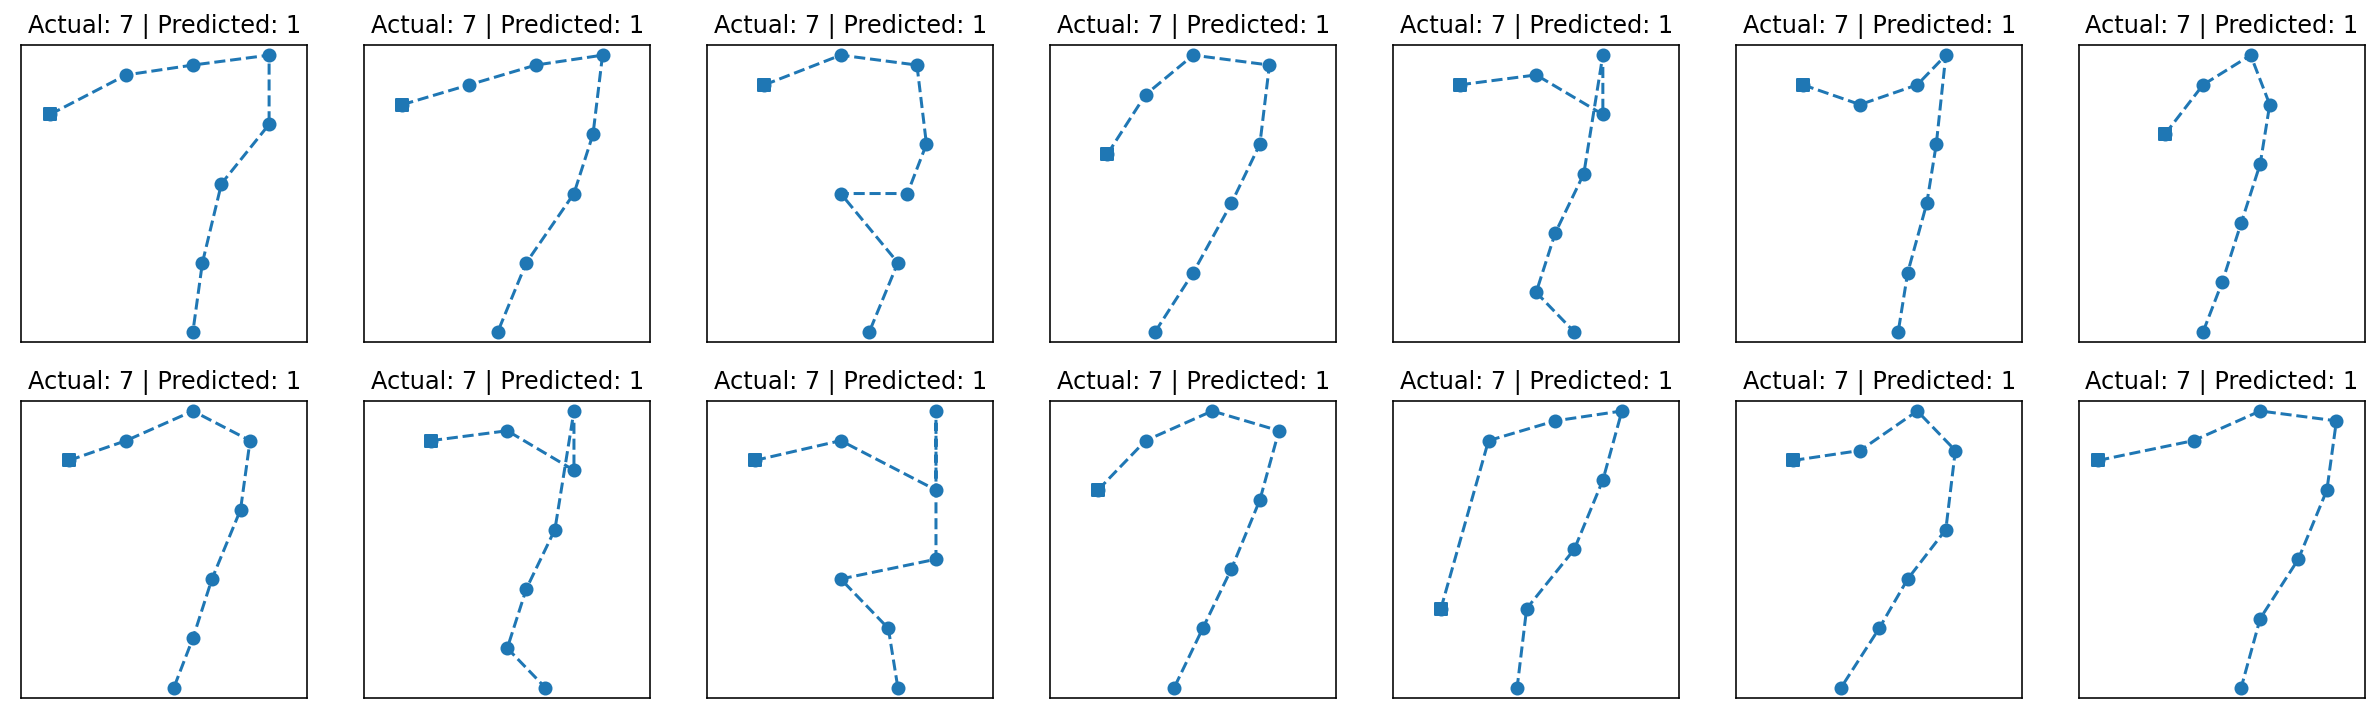

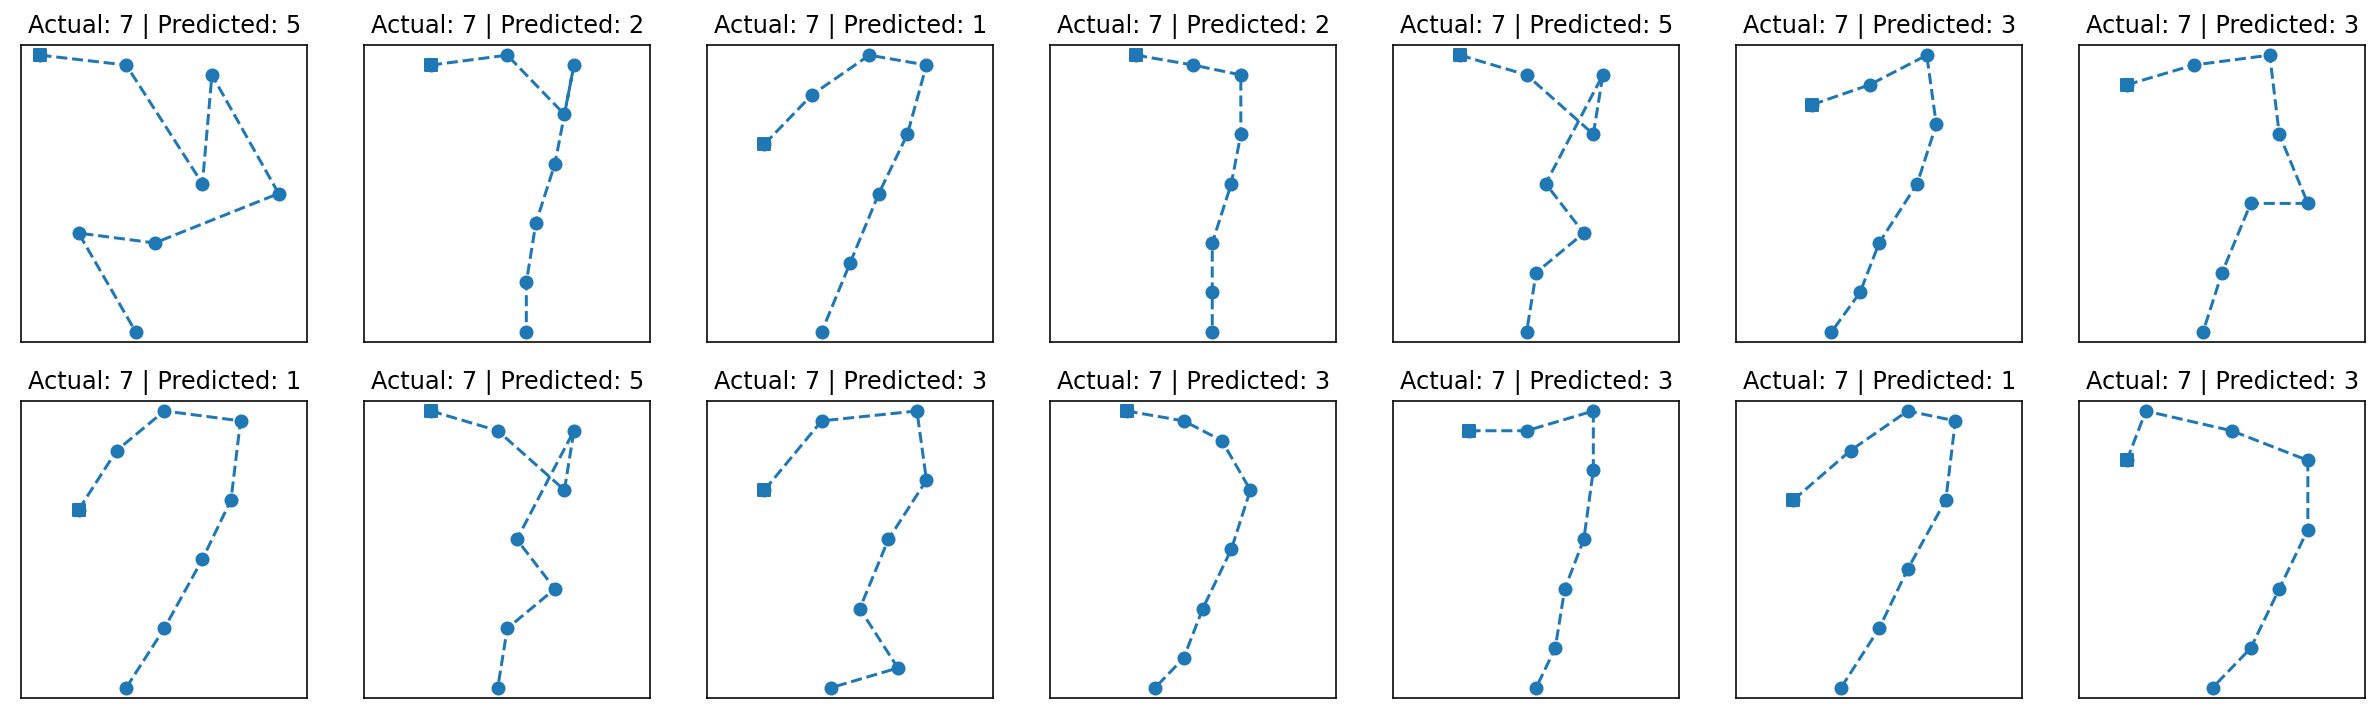

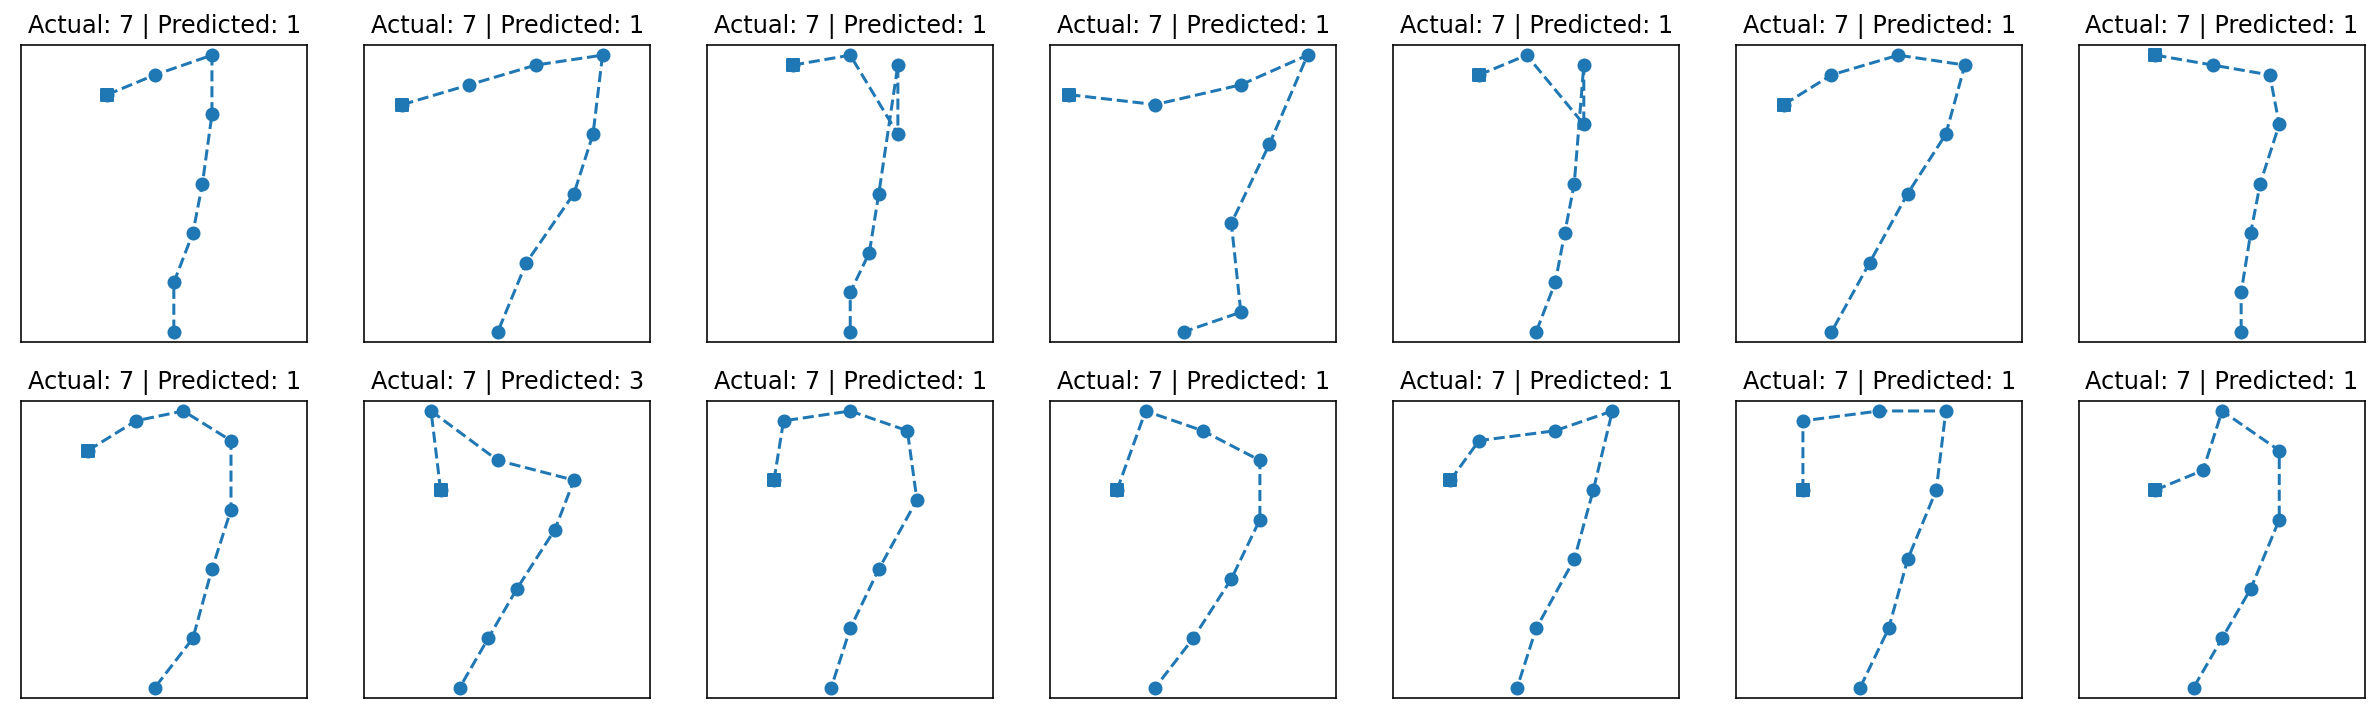

In [ ]:
for model, name in [(knn, 'KNN'), (tree, 'Decision Tree'), (svm, 'SVM')]:
    np.random.seed(2)
    y_pred = model.predict(Xtest)
    misclassified = np.where(ytest!=y_pred)[0]
    numclass = np.where(ytest==7)[0]
    misclassifiedclass = Intersection(misclassified, numclass)
    correct = np.where(ytest==y_pred)[0]
    r, c = 2,7
    samples = np.random.choice(misclassifiedclass, r*c)
    fig = plt.figure(figsize=(21,6))
    for i in range(r*c):
        plt.subplot(r,c,i+1)
        p = Xtest.iloc[samples[i]].values.reshape((8,2))
        plt.plot(p[:,0],p[:,1],'--o')
        plt.scatter(p[0,0],p[0,1],marker='s')
        plt.title('Actual: '+str(ytest[samples[i]])+' | Predicted: '+str(y_pred[samples[i]]))
        # plot_mnist(mnist_complete[indexes[i]])
        plt.xlim((-1,29))
        plt.ylim((-1,29))
        plt.xticks([])
        plt.yticks([])
#     fig.suptitle('Examples misclassified by '+ name)
    print(name)

In [ ]:
x = any(y==202 for y in indexes)
print(x)

True


In [ ]:
# flat_indexes = [item for sublist in indexes for item in sublist]
# sample_indexes = [flat_indexes[i] for i in samples]

TypeError: ignored

In [ ]:
correct_indexes = [flat_indexes[i] for i in correct]
import pickle
with open("correct_indexes", "wb") as fp:
    pickle.dump(correct_indexes, fp)

In [ ]:
len(correct_indexes)

400

In [ ]:
plt.figure(figsize=(21,6))
r, c = 2,7
for i in range(len(sample_indexes)):
    plt.subplot(r,c,i+1)
    img = mnist_complete.iloc[sample_indexes[i]].values.reshape((28,28))
    plot_mnist(img, ytest[samples[i]])

NameError: ignored